This is a simple example for showing the usage of state vector, observable, and density matrix.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qulacs import Observable, QuantumState, DensityMatrix
#from qulacs.gate import H
#from qulacsvis import circuit_drawer
from qulacs.gate import DenseMatrix

from utility import *

In [2]:
nqubits = 2
state = QuantumState(nqubits)
#state.set_computational_basis(0b110)
#for i in range(nqubits):
#    H(i).update_quantum_state(state)

my_vector = [ 0.5 for i in range(2**nqubits)]
state.load(my_vector)

print(state.get_vector())

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


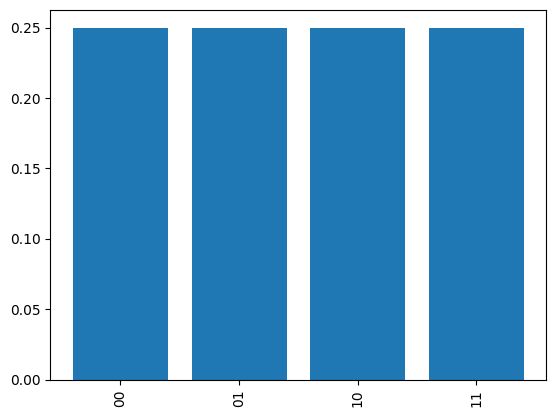

In [3]:
show_distribution(state)

In [4]:
XX_matrix = np.array([[0, 0, 0, 1], 
                      [0, 0, 1, 0],
                      [0, 1, 0, 0],
                      [1, 0, 0, 0]])

ZZ_matrix = np.array([[1, 0, 0, 0], 
                      [0, -1, 0, 0],
                      [0, 0, 1, 0],
                      [0, 0, 0, -1]])

YY_matrix = np.array([[0, 0, 0, -1], 
                      [0, 0, 1, 0],
                      [0, 1, 0, 0],
                      [-1, 0, 0, 0]])

In [5]:
my_vector = state.get_vector()
exp = my_vector @ XX_matrix @ my_vector.T
print(exp)
exp_ZZ = my_vector @ ZZ_matrix @ my_vector.T
print(exp_ZZ)
exp_YY = my_vector @ YY_matrix @ my_vector.T
print(exp_YY)

(1+0j)
0j
0j


In [6]:
measurement = Observable(nqubits)
measurement.add_operator(1.0,"X 0 X 1")
show_observable(measurement)

(1+0j) X0 X1


In [7]:
measurement.get_expectation_value(state)

1.0

In [8]:
measurement_ZZ = Observable(nqubits)
measurement_ZZ.add_operator(1.0,"Z 0 Z 1")
show_observable(measurement_ZZ)

(1+0j) Z0 Z1


In [9]:
measurement_ZZ.get_expectation_value(state)

0.0

In [10]:
measurement_YY = Observable(nqubits)
measurement_YY.add_operator(1.0,"Y 0 Y 1")
show_observable(measurement_YY)

(1+0j) Y0 Y1


In [11]:
measurement_YY.get_expectation_value(state)

0.0

In [12]:
density_matrix = DensityMatrix(nqubits)
print(density_matrix)

 *** Density Matrix ***
 * Qubit Count : 2
 * Dimension   : 4
 * Density matrix : 
(1,0) (0,0) (0,0) (0,0)
(0,0) (0,0) (0,0) (0,0)
(0,0) (0,0) (0,0) (0,0)
(0,0) (0,0) (0,0) (0,0)



In [13]:
psi_matrix = 0.25*np.array([[1, 1, 1, 1], 
                            [1, 1, 1, 1],
                            [1, 1, 1, 1],
                            [1, 1, 1, 1]])

In [14]:
density_matrix.load(psi_matrix)
print(density_matrix)

 *** Density Matrix ***
 * Qubit Count : 2
 * Dimension   : 4
 * Density matrix : 
(0.25,0) (0.25,0) (0.25,0) (0.25,0)
(0.25,0) (0.25,0) (0.25,0) (0.25,0)
(0.25,0) (0.25,0) (0.25,0) (0.25,0)
(0.25,0) (0.25,0) (0.25,0) (0.25,0)



In [15]:
exp_den = measurement.get_expectation_value(density_matrix)
print(exp_den)

1.0


In [16]:
exp_den_ZZ = measurement_ZZ.get_expectation_value(density_matrix)
print(exp_den_ZZ)

0.0


In [17]:
exp_den_YY = measurement_YY.get_expectation_value(density_matrix)
print(exp_den_YY)

0.0
